In [2]:
%matplotlib inline
# imported necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn import cross_validation

# using the SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 
filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 limit 30000
""", con) 

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'




/home/dtewani/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
https://github.com/Prakhar-FF13/Amazon-Fine-Food-Reviews

In [3]:


#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative


In [4]:
filtered_data.shape #looking at the number of attributes and size of the data
#filtered_data.head()

(30000, 10)

In [5]:


#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')



In [6]:
final = sorted_data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(28072, 10)

In [7]:
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

93.57333333333332

In [8]:
final = final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [9]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(28072, 10)


positive    23606
negative     4466
Name: Score, dtype: int64

In [10]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"isn't", 'only', 'of', 'from', 'll', 'and', 'the', "you'll", 'shan', 't', 'your', "hasn't", 'once', 've', 'after', 'no', 'now', 'wouldn', 'here', 'hers', "it's", 'themselves', 'being', "you've", 'is', "mustn't", 're', 'mightn', 'needn', 'yourself', 'was', 'by', 'y', "couldn't", 'them', 'than', 'his', 'aren', 'him', 'while', "you'd", 'he', 'such', 'you', 'again', 'just', "mightn't", 'yours', 'd', 'himself', 'whom', 'ours', 'my', 'am', 'through', 's', 'as', 'an', 'be', 'any', 'these', 'during', 'in', 'most', 'don', "you're", 'few', 'won', 'been', 'can', 'will', 'each', 'they', "wouldn't", 'her', 'are', "won't", 'couldn', 'haven', 'off', "weren't", 'that', 'further', 'me', 'should', 'doesn', 'very', 'at', "haven't", 'does', 'into', 'under', 'has', 'their', 'yourselves', 'our', 'had', 'were', 'between', 'ma', 'theirs', 'itself', 'against', 'not', 'if', 'ain', 'above', 'hadn', 'do', 'or', "aren't", 'why', 'weren', 'myself', 'then', 'o', "didn't", 'all', 'a', 'with', 'to', 'didn', 'have', '

In [11]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [12]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 

In [13]:
final['CleanedText']

22621    b'dog love saw pet store tag attach regard mad...
22620    b'dog love chicken product china wont buy anym...
2546     b'product avail www amazon com victor trap unr...
2547     b'use victor fli bait season cant beat great p...
1145     b'receiv shipment could hard wait tri product ...
1146     b'realli good idea final product outstand use ...
8696     b'ive use brand year your feel clog ate massiv...
8695     b'good flavor uniqu tea ive tri tea effect cle...
8694     b'your new product need care dosag strong batc...
2942     b'glad cocker standard poodl puppi love stuff ...
2941     b'use food month find excel fact two dog coton...
1071     b'nine cat crazi kibbl last thing want cat foo...
5905     b'cat third favorit food great stuff gravi thi...
5906     b'anoth favorit hous cat doesnt want time mont...
5907     b'one great basic food whatev cat realli mine ...
5897     b'honest say wont buy varieti look bad smell b...
5896     b'cours nobodi ever figur cat like experi oppo.

In [14]:
data=filtered_data

# Sampling the data :
pos_data = data[data['Score'] == 'positive']
neg_data = data[data['Score'] == 'negative']
sample_data = pd.concat([pos_data, neg_data])
sample_data['Score'].value_counts()


#pos_data = data[data['Score'] == 'positive'][:400]
#neg_data = data[data['Score'] == 'negative'][:400]
#sample_data = pd.concat([pos_data, neg_data])
#sample_data['Score'].value_counts()





positive    25160
negative     4840
Name: Score, dtype: int64

In [15]:
sample_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [16]:

# Removing the score column as it is not needed.
sample_data = sample_data.drop('Score', axis = 1)
sample_data.head(2)



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [17]:


# Generating bag of words features.
count_vect = CountVectorizer()
bow = count_vect.fit_transform(sample_data['Text'].values)
bow.shape



(30000, 31375)

In [ ]:
https://github.com/Prakhar-FF13/Amazon-Fine-Food-Reviews/blob/master/Amazon%20Reviews%20Clustering.ipynb

In [18]:
# Importing k-Means class from sklearn
from sklearn.cluster import KMeans

In [19]:


# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus



[3, 4, 5, 6, 7, 8, 9, 10]

2019-02-21 16:34:42.690964


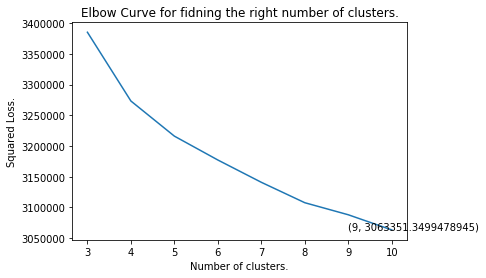

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  3063351.3499478945
2019-02-21 17:43:01.762750


In [21]:
# Choosing the best cluster using Elbow Method.
from datetime import datetime
start =datetime.now()
print(start)
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(bow) # Training Clustering.
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
   
    
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve for fidning the right number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

end =datetime.now()
print(end)

In [22]:
from datetime import datetime

start =datetime.now()
start 
# Training the best model --
model = KMeans(n_clusters = optimal_clusters, n_jobs = -1)
model.fit(bow)

end=datetime.now()
end

datetime.datetime(2019, 2, 21, 17, 53, 20, 683922)

In [23]:


# Giving Labels/assigning a cluster to each point/text 
df = sample_data
df['Bow Clus Label'] = model.labels_
df.head(2)



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Bow Clus Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,8


In [24]:
# How many points belong to each cluster ->
df.groupby(['Bow Clus Label'])['Text'].count()

Bow Clus Label
0     5308
1      869
2    13577
3     1641
4       13
5      196
6     5366
7      918
8     2112
Name: Text, dtype: int64

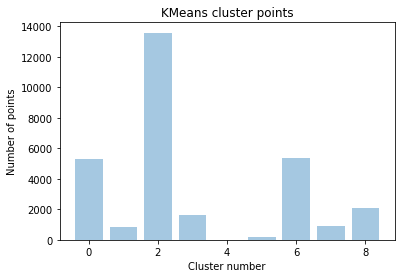

In [25]:
plt.bar([x for x in range(optimal_clusters)], df.groupby(['Bow Clus Label'])['Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()


In [26]:
# Reading a review which belong to each group.
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Bow Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
The Strawberry Twizzlers are my guilty pleasure - yummy. Six pounds will be around for a while with my son and I.


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
I really like the Maple and Brown Sugar flavor. The regular is fine with brown sugar added. The Apples and Cinnamon flavor is OK. This is a very quick, easy and satisfying breakfast and I'll order this brand again, but not the variety. I'll get all Maple and Brown Sugar.


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than 

In [28]:
# This KMedoids file is obtained from -> https://github.com/letiantian/kmedoids
import kmedoids
from sklearn.metrics import pairwise_distances

In [29]:


# Converting to dataframe to array.
#bow = bow.toarray()
#bow.shape

bow=bow.todense()
bow.shape

(30000, 31375)

In [30]:
# Computing pariwise distances.
D = pairwise_distances(bow, metric='euclidean', n_jobs=1)



In [31]:
# For finding optimal value of number of clusters.
start =datetime.now()
print(start)

def compute_loss(M, C, data): # Squared Loss. !!
    loss = 0.0
    for key, arr in C.items():
        for pos in arr:
            loss = loss + ((data[M[key]] - data[pos]).sum()) ** 2
    
    return loss

# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus


2019-02-21 18:24:42.907189


[3, 4, 5, 6, 7, 8, 9, 10]

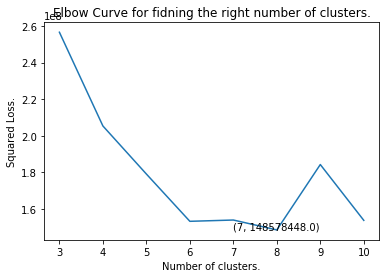

The optimal number of clusters obtained is -  7
The loss for optimal cluster is -  148578448.0


In [32]:
# Choosing the best cluster using Elbow Method.
squared_errors = []
for cluster in num_clus:
    M, C = kmedoids.kMedoids(D, 3,1) # Training Clustering.
    squared_errors.append(compute_loss(M, C, bow)) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve for fidning the right number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))   

In [33]:
M, C = kmedoids.kMedoids(D, k = optimal_clusters) # Using optimal_cluster to best kmedoid.

In [34]:
# Looking at cluster center and a point near them.
q = 0
for i in M:
    print ("Cluster ", q)
    print (" ")
    print (sample_data.iloc[i]['Text'])
    print ("\nA Review belonging to this cluster. -> \n")
    print (sample_data.iloc[C[q][0]]['Text'])
    print ("\n")
    print ("*" * 90)
    q = q + 1

Cluster  0
 
Before I begin my review, let me say this... I read the product specs, ESPECIALLY THE DIMENSIONS...<br />I measured the space I have, and armed with that knowledge, I ordered the item.<br /><br />The item is exactly as described and pictured... and because I pre-measured, I KNEW it would fit (unlike other reviewers who apparently couldn't be bothered, and then give it a low-rating as a result).<br /><br />It's a simple design, and well built.  It's sturdy enough to hold the weight of my LARGE Cuisinart k-cup brewer, with a full reservoir.  It's a solid wire-frame build, and the rails the drawer runs on are part of that wire-design.  The mesh walls are a tad light-weight, but they aren't load-bearing, and are only meant for aesthetics and to contain the k-cups. (I also store Splenda packets in one column of mine.)<br /><br />Other than my 'normal' blend, I tend to have up to 5 additional flavors for a weekend treat, or just to mix it up on occasion... keeping these loose on

In [35]:
# Plotting Number of points in each cluster .
counts = []
for key, arr in C.items():
    counts.append(len(arr))
counts


[518, 730, 9643, 2548, 7900, 2098, 6563]

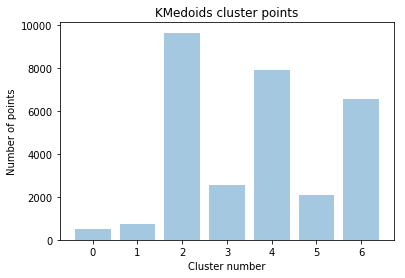

In [36]:
plt.bar([x for x in range(optimal_clusters)], counts, alpha = 0.4)
plt.title('KMedoids cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [37]:
# Importing Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [38]:
bow = bow.toarray()
bow.shape

AttributeError: 'matrix' object has no attribute 'toarray'

In [41]:
# Checking agglomerative Clustering groupings ->
df = sample_data
for cluster in num_clus:
    agg = AgglomerativeClustering(n_clusters=cluster)
    agg.fit(bow)
    print("*" * 40, "  For Number of Clusters = ", cluster, "  ", "*" * 40)
    print("\nReviews for each of the clusters : \n")
    df = sample_data
    df['Clst'] = agg.labels_
    df = df.groupby(['Clst'])
    # Printing two reviews from each cluster, if they contain at-least points.
    for i in range(cluster):
        print("For cluster ", i, "\n")
        print("Review 1 -> \n")i 
        print(sample_data.iloc[df.groups[i][0]]['Text'])
        if(len(df.groups[i]) > 1):
            print("\n")
            print("Review 2 -> \n")
            print(sample_data.iloc[df.groups[i][1]]['Text'])
        print("-" * 80)
    
    print("_" * 80)
    print("\n")

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [73]:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [80]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100

In [83]:
df_db = sample_data
# Training DBSCAN :
model = DBSCAN(eps = 10, min_samples = minPts, n_jobs=-1)
model.fit(bow)


df['Bow DBSCAN Clus Label'] = model.labels_
df.head(200)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Bow Clus Label,Bow DBSCAN Clus Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,4,0
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,0
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,4,0
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,4,0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,4,0
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,4,0
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,2,-1
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,0,0


In [67]:
final.head(3) #below the processed review can be seen in the CleanedText Column 


# store final table into an SQlLite table for future.
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [68]:
con = sqlite3.connect("final.sqlite")
cleaned_data = pd.read_sql_query("select * from Reviews", con)

In [69]:
cleaned_data.shape

(998, 11)

In [20]:
#cleaned_data.head()

In [70]:
cleaned_data["Score"].value_counts()

positive    841
negative    157
Name: Score, dtype: int64

In [71]:
# To randomly sample 100k points from both class

data_pos = cleaned_data[cleaned_data["Score"] == "positive"].sample(n = 50)
data_neg = cleaned_data[cleaned_data["Score"] == "negative"].sample(n = 50)
final_100k = pd.concat([data_pos, data_neg])
final_100k.shape

(100, 11)

In [72]:
final_100k["Time"] = pd.to_datetime(final_100k["Time"], unit = "s")
final_100k = final_100k.sort_values(by = "Time")
#final_100k.head()

In [39]:
# 100k data which will use to train model after vectorization
X = final_100k["CleanedText"]
print("shape of X:", X.shape)
X

shape of X: (100,)


257    b'kettl brand chip crunchi would say regular p...
517    b'mix poor packag break open easili ship near ...
528    b'first ball work pretti well look littl beate...
130    b'chip truli amaz theyr light crisp great tast...
518    b'aw thought food suppos tast good eat ice cre...
187    b'chip good couldnt stop eat didnt last long r...
261    b'tri herr utz wise pringl lay etc kettl tast ...
198    b'like kettl chip realli disappoint order cook...
167    b'chip greasi tast greas bottom bag chip satur...
445    b'salsa smell delici think probabl unfortun pe...
169    b'defint tasti madhous munchi famili favorit k...
408    b'idea good caramel flavor ginger pistachio do...
157    b'addict salti tangi flavor open first bag sea...
113    b'like plocki like plocki plocki mean fuss tas...
543    b'els need know oatmeal instant make half cup ...
114    b'plocki red bean rice tortilla chip realli ta...
100    b'chip perfect snack without salsa textur brit...
230    b'realli look forward tr

In [79]:
# class label
y =final_100k["Score"]
print("shape of y:", y.shape)
#y=np.where([['positive', 'negative'], [1, 0]])
y
Z =final_100k["Score"]

shape of y: (100,)


In [69]:
#Score as positive/negative -> 0/1
def polarity(x):
    if x == "positive":
        return 0
    else:
        return 1
y =y.map(polarity) #Map all the scores as the function polarity i.e. positive or negative
y

257    0
517    1
528    1
130    0
518    1
187    0
261    0
198    1
167    1
445    1
169    1
408    1
157    0
113    0
543    0
114    0
100    0
230    1
394    0
420    0
426    0
161    1
456    1
633    1
578    0
366    1
431    0
513    0
45     1
785    0
      ..
648    1
949    0
691    1
462    1
265    1
620    0
251    0
253    0
923    1
874    1
913    0
664    0
968    0
38     1
502    0
482    0
133    1
713    0
90     1
986    1
971    1
862    1
520    0
948    0
362    0
235    0
802    0
942    1
846    0
430    1
Name: Score, dtype: int64

In [70]:
y

257    0
517    1
528    1
130    0
518    1
187    0
261    0
198    1
167    1
445    1
169    1
408    1
157    0
113    0
543    0
114    0
100    0
230    1
394    0
420    0
426    0
161    1
456    1
633    1
578    0
366    1
431    0
513    0
45     1
785    0
      ..
648    1
949    0
691    1
462    1
265    1
620    0
251    0
253    0
923    1
874    1
913    0
664    0
968    0
38     1
502    0
482    0
133    1
713    0
90     1
986    1
971    1
862    1
520    0
948    0
362    0
235    0
802    0
942    1
846    0
430    1
Name: Score, dtype: int64

In [71]:
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X = bow.fit_transform(X)


AttributeError: lower not found

In [72]:
Z = bow.fit_transform(Z)

In [78]:
Z

<100x2 sparse matrix of type '<class 'numpy.int64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [29]:
Nc = range(1, 20)

In [82]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)




In [83]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [85]:
kmeans.labels_

c=kmeans.labels_
centroids = kmeans.cluster_centers_
centroids
X

<100x1488 sparse matrix of type '<class 'numpy.int64'>'
	with 3656 stored elements in Compressed Sparse Row format>

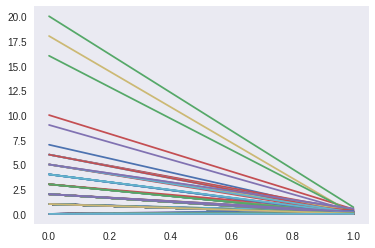

In [56]:
plt.plot(centroids) 
plt.grid() ## Show the grids
plt.show()

In [87]:


# Number of clusters to check.
num_clus = [x for x in range(1,20)]
num_clus



# Choosing the best cluster using Elbow Method.
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster, n_jobs = -1).fit(X) # Training Clustering.
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list

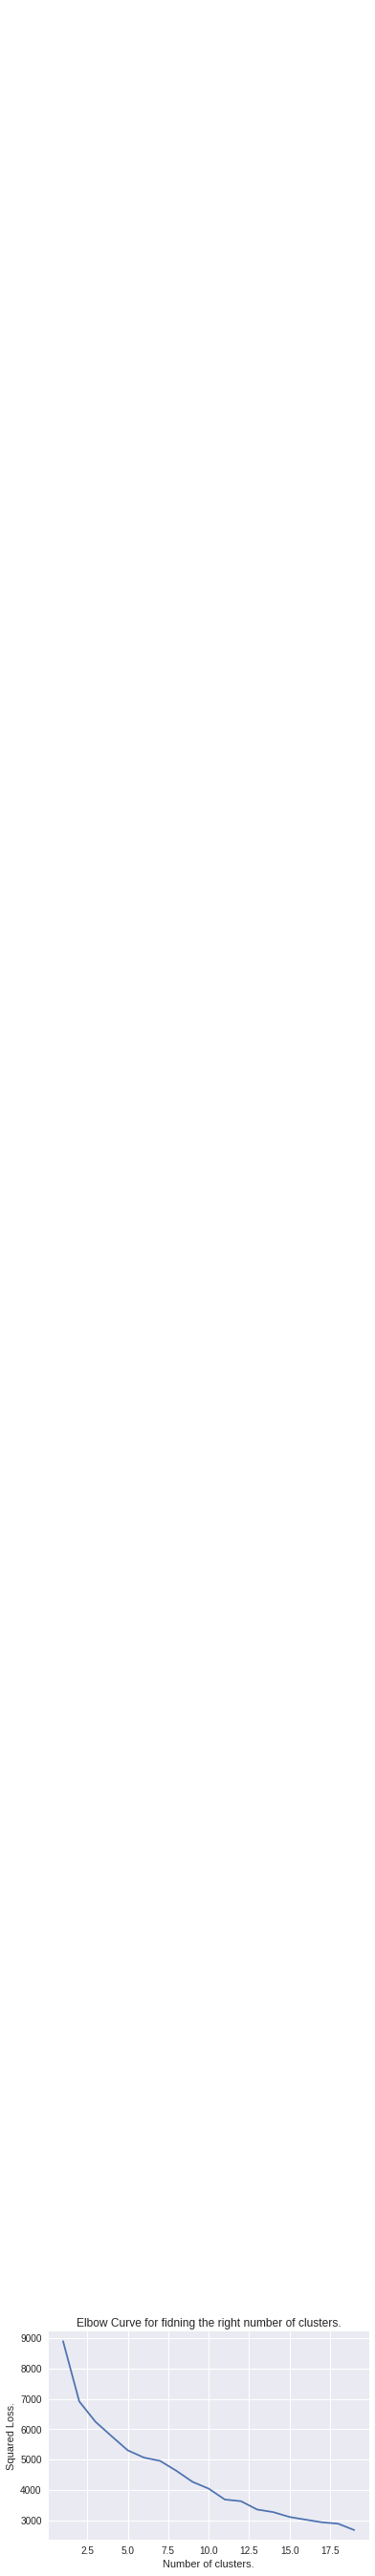

The optimal number of clusters obtained is -  20
The loss for optimal cluster is -  2678.750384024578


In [88]:
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve for fidning the right number of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [90]:
# Training the best model --
model = KMeans(n_clusters = optimal_clusters, n_jobs = -1)
model.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
# Giving Labels/assigning a cluster to each point/text 
df = final['CleanedText']
df['CleanedText'] = model.labels_
df.head(2)

10     b'dont know cactus tequila uniqu combin ingred...
232    b'five minut one tentacl bitten ball insid cra...
Name: CleanedText, dtype: object

In [99]:
# How many points belong to each cluster ->
df.groupby(['CleanedText'])['Text'].count()

AssertionError: Grouper and axis must be same length

In [80]:

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(X).score(Z) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

ValueError: could not convert string to float: 'negative'

In [25]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(70,) (70,) (30,)


In [26]:
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X_train = bow.fit_transform(X_train)

In [27]:
x_test = bow.transform(x_test)

In [28]:

from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)


Train Data Size:  (70, 940)


In [29]:

x_test = preprocessing.normalize(x_test)
#print("Test Data Size: ",x_test.shape)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision',

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-pac

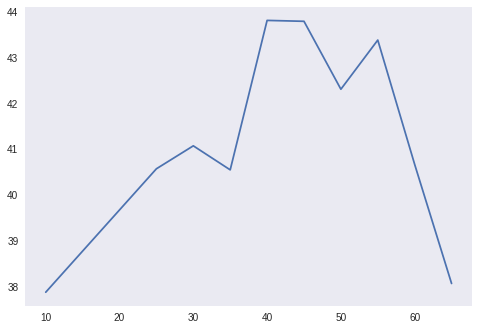

In [30]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
%time
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
g = sp_randint(2,300)
a=[]
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
for train, cv in tscv.split(X_train):
#     print("%s %s" % (train, cv))
    #print(X_train[train].shape, X_train[cv].shape)
    clf = DecisionTreeClassifier()
    param_grid = {'max_depth':sorted(g.rvs(30))} #params we need to try on classifier
    tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
    gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='f1')
    gsv.fit(X_train,y_train)
    #print("Best HyperParameter: ",gsv.best_params_)
    #print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
    c=gsv.best_score_*100
    a.append(c)
    #print('tsssv', cv)
    #plt.plot( X_train[cv],c)
    #fig = plt.figure()
    #plt.show()'''
#print (cv)   
Y=[70.60317460317461, 70.26984126984127, 70.16666666666666, 70.42857142857142, 69.11904761904762, 71.05555555555554, 71.65079365079364, 69.62698412698413, 70.66666666666666, 70.66666666666667]
X=[10,25,30,35,40,45,50,55,60,65]
plt.plot(X,a) 
plt.grid() ## Show the grids
plt.show()
#print(a)

In [95]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

g = sp_randint(2,300)
clf = DecisionTreeClassifier()
param_grid = {'max_depth':sorted(g.rvs(30))} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='f1')
gsv.fit(X_train,y_train)
#savetofile(gsv,"Decision Trees/gsv_tfidf")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
c=gsv.best_score_*100

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision',

Best HyperParameter:  {'max_depth': 131}
Best Accuracy: 58.55%


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done 300 out of 300 | elap

In [96]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7

In [97]:

kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100

In [98]:


model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print (results)

[0.71428571 0.71428571 0.71428571 0.85714286 0.57142857 0.85714286
 0.71428571 0.28571429 0.85714286 0.71428571]


In [99]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [123]:
seed = 7
num_trees = 100
max_features = 3
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())
print(model)
print(kfold)

0.5996732026143792
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
KFold(n_splits=4, random_state=None, shuffle=False)


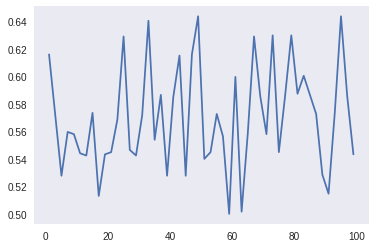

In [111]:
num_trees1=[]
result2=[]
for i in range(1,100,2):
        #print (i)
        num_trees1.append(i)
        kfold = model_selection.KFold(n_splits=4, random_state=None)
        model = RandomForestClassifier(n_estimators=i, max_features=max_features)
        results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
        #print(results.mean())
        result1=results.mean()
        result2.append(result1)
X=num_trees1     
Y=result2
plt.plot(X,Y) 
plt.grid() ## Show the grids
plt.show()

In [112]:
model = RandomForestClassifier(random_state=42)

In [113]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [116]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [200, 500], 'max_depth': [4, 5, 6, 7, 8], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:

CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 500}

In [124]:
model = RandomForestClassifier(n_estimators=500, max_features=max_features,criterion='gini',max_depth=4)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.45833333333333337


In [ ]:
seed = 7
num_trees = 100
max_features = 3
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())
print(model)
print(kfold)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [319]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.5285714285714286


In [321]:
from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.5999999999999999


In [323]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.5571428571428572


/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or '

In [128]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.5857142857142856


In [129]:
model =GradientBoostingClassifier(random_state=42)

In [151]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2','auto'],
    'max_depth' : [3,4,5,6,7,8],
    'learning_rate' :[0.0000001,.1]
   
}

In [152]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [1e-07, 0.1], 'n_estimators': [200, 500], 'max_depth': [3, 4, 5, 6, 7, 8], 'max_features': ['sqrt', 'log2', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
CV_rfc.best_params_

{'learning_rate': 1e-07,
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 200}

In [156]:
model = GradientBoostingClassifier(n_estimators=200, max_features='auto')
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.5980392156862745


In [246]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

g = sp_randint(2,300)
clf = DecisionTreeClassifier()
param_grid = {'max_depth':sorted(g.rvs(30))} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='f1')
#c=gsv.best_score_*100
#a_gsv=gsv.fit(X_train,y_train)
#savetofile(gsv,"gsv.uni")
print("Best HyperParameter: ",gsv.best_params_)
#print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))
#print('gsssv', gsv)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
'''lt.xlim(0,300)
plt.ylim(0.0,0.3)
plt.xlabel(r"max depth",fontsize=15)
plt.ylabel("f1-score")
plt.title(r'F1 Score v/s Max Depth')'''
plt.plot(x,y)
plt.show()

In [71]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y

CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 22.6 µs


In [77]:
print("shape of X:", y.shape)

shape of X: (100,)


In [78]:
#Breaking into Train and test
#X_train, X_test, y_train, y_test = train_test_split(df_sample['CleanedText'].values,df_sample['Score'].values,test_size=0.3,shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#train_test_split(X, y, test_size = 0.3, random_state = 42)
tfidf = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams
X_train = tfidf.fit_transform(X_train)
#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = tfidf.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (70, 3199)
Test Data Size:  (30, 3199)


In [79]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

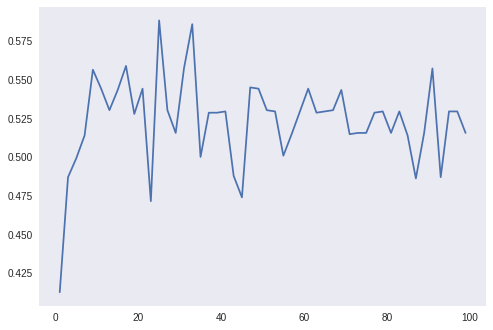

In [80]:
num_trees1=[]
result2=[]
for i in range(1,100,2):
        #print (i)
        num_trees1.append(i)
        kfold = model_selection.KFold(n_splits=4, random_state=None)
        model = RandomForestClassifier(n_estimators=i, max_features=max_features)
        results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
        #print(results.mean())
        result1=results.mean()
        result2.append(result1)
X=num_trees1     
Y=result2
plt.plot(X,Y) 
plt.grid() ## Show the grids
plt.show()

In [81]:
model = RandomForestClassifier(random_state=42)

In [82]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [84]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/root/anaconda2/envs/py34/lib/python3.4/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8], 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 500}

In [94]:
model = RandomForestClassifier(n_estimators=500, max_features='auto',criterion='entropy',max_depth=6)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.4722222222222222


In [ ]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

g = sp_randint(2,300)
clf = DecisionTreeClassifier()
param_grid = {'max_depth':sorted(g.rvs(30))} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='f1')
gsv.fit(X_train,y_train)
#savetofile(gsv,"Decision Trees/gsv_tfidf")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

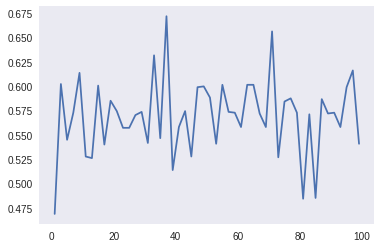

In [154]:
num_trees1=[]
result2=[]
for i in range(1,100,2):
        #print (i)
        num_trees1.append(i)
        kfold = model_selection.KFold(n_splits=4, random_state=None)
        model = RandomForestClassifier(n_estimators=i, max_features=max_features)
        results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
        #print(results.mean())
        result1=results.mean()
        result2.append(result1)
X=num_trees1     
Y=result2
plt.plot(X,Y) 
plt.grid() ## Show the grids
plt.show()

In [31]:
from gensim.models import KeyedVectors

#Loading the model from file in the disk
w2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 

In [32]:
w2v_vocub = w2vec_model.wv.vocab
len(w2v_vocub)

/root/anaconda2/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


3000000

In [33]:
%%time
avg_vec_google = [] #List to store all the avg w2vec's 
# no_datapoints = 364170
# sample_cols = random.sample(range(1, no_datapoints), 20001)
for sent in final_100k["CleanedText"]:
    cnt = 0 #to count no of words in each reviews
    sent_vec = np.zeros(300) #Initializing with zeroes
#     print("sent:",sent) 
    sent = sent.decode("utf-8") 
    for word in sent.split():
        try:
#             print(word)
            wvec = w2vec_model.wv[word] #Vector of each using w2v model
#             print("wvec:",wvec)
            sent_vec += wvec #Adding the vectors
#             print("sent_vec:",sent_vec)
            cnt += 1
        except: 
            pass #When the word is not in the dictionary then do nothing  
#     print(sent_vec)
    sent_vec /= cnt #Taking average of vectors sum of the particular review
#     print("avg_vec:",sent_vec)
    avg_vec_google.append(sent_vec) #Storing the avg w2vec's for each review
#     print("*******************************************************************")
# print(avg_vec_google)
avg_vec_google = np.array(avg_vec_google)

CPU times: user 39.8 ms, sys: 9.06 ms, total: 48.8 ms
Wall time: 39.5 ms


/root/anaconda2/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [35]:
avg_vec_google

array([[ 0.04516602, -0.05055455,  0.03747341, ..., -0.07660784,
        -0.10468401, -0.01198033],
       [-0.03112657,  0.00053745, -0.01419474, ..., -0.00836826,
         0.01987678,  0.02400106],
       [-0.04353587,  0.0278155 , -0.01305326, ..., -0.03190486,
         0.05610053,  0.03205872],
       ...,
       [-0.02336693,  0.06621742, -0.01037121, ..., -0.03712463,
         0.00594759,  0.01109314],
       [-0.00750498, -0.01456393, -0.04819899, ..., -0.01081261,
        -0.0273414 , -0.05347619],
       [-0.00885331,  0.07667301,  0.03324167, ...,  0.01699909,
        -0.04052734,  0.02398682]])

In [36]:
np.isnan(avg_vec_google).any()

False

In [37]:
mask = ~np.any(np.isnan(avg_vec_google), axis=1)
# print(mask)
avg_vec_google_new = avg_vec_google[mask]
df_sample_new = y[mask]
print(avg_vec_google_new.shape)
print(df_sample_new.shape)

(100, 300)
(100,)


In [38]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

avg_vec_norm = preprocessing.normalize(avg_vec_google_new)

#Not shuffling the data as we want it on time basis
X_train, X_test, y_train, y_test = train_test_split(avg_vec_norm,df_sample_new.values,test_size=0.3,shuffle=False)

In [39]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.5428571428571429


In [40]:
model =GradientBoostingClassifier(random_state=42)

In [41]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2','auto'],
    'max_depth' : [3,4,5,6,7,8],
    'learning_rate' :[0.0000001,.1]
   
}


In [42]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [1e-07, 0.1], 'max_depth': [3, 4, 5, 6, 7, 8], 'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
CV_rfc.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [53]:
model = GradientBoostingClassifier(n_estimators=200, max_features='auto',learning_rate=0.1)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.5571428571428572


In [55]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

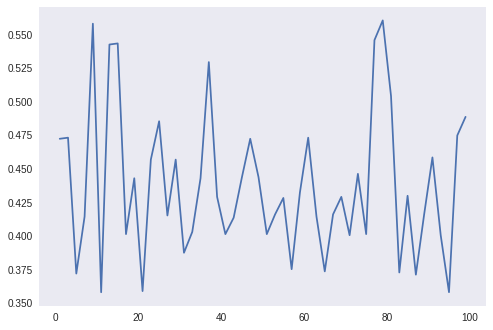

In [56]:
num_trees1=[]
result2=[]
for i in range(1,100,2):
        #print (i)
        num_trees1.append(i)
        kfold = model_selection.KFold(n_splits=4, random_state=None)
        model = RandomForestClassifier(n_estimators=i, max_features=max_features)
        results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
        #print(results.mean())
        result1=results.mean()
        result2.append(result1)
X=num_trees1     
Y=result2
plt.plot(X,Y) 
plt.grid() ## Show the grids
plt.show()

In [57]:
model = RandomForestClassifier()

In [58]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [59]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8], 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [63]:
model = RandomForestClassifier(n_estimators=500, max_features='auto',criterion='gini',max_depth=5)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.48774509803921573


In [ ]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

g = sp_randint(2,300)
clf = DecisionTreeClassifier()
param_grid = {'max_depth':sorted(g.rvs(30))} #params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,scoring='f1')
gsv.fit(X_train,y_train)
#savetofile(gsv,"Decision Trees/gsv_aw2v")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

In [165]:
%%time
#Taking Sample Data as it was taking more that 10 hours to computer this block
n_samples = 100
df_sample_new = final_100k["CleanedText"].sample(n_samples)

###Sorting as we want according to time series
#df_sample_new.sort_values('Time',inplace=True) 

###tf-idf with No Stemming
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams

tfidf_vec_new = tfidf.fit_transform(final_100k["CleanedText"].values)

#print(tfidf_vec_new.shape)

# tf-idf came up with 2.9 million features for the data corpus
# from sklearn.decomposition import TruncatedSVD

# tsvd_tfidf_ns = TruncatedSVD(n_components=300)#No of components as total dimensions
# tsvd_tfidf_vec_ns = tsvd_tfidf_ns.fit_transform(tfidf_vec_ns)
# print(tsvd_tfidf_ns.explained_variance_ratio_[:].sum())
features = tfidf.get_feature_names()

CPU times: user 23.4 ms, sys: 1.01 ms, total: 24.4 ms
Wall time: 30 ms


In [166]:
df_sample_new

933    b'laddoo turn bad day receiv item insid fridg ...
739    b'singl sell store box singl sure amazon sell ...
767    b'convinc human anim cracker look tast exact l...
641    b'made chocol chip cooki brm garbanzo bean flo...
914    b'husband disappoint coffe weak wateri cup cof...
642    b'candi describ middl almost hard silki smooth...
479    b'mani healthi product dont tast good tast goo...
231    b'great chip great price odd like fish chip so...
626    b'wow soooo good easili becom favorit dress ty...
631    b'recent purchas sale local groceri store know...
337    b'product must qualifi sort decept packag awar...
155    b'best spici chip ever pleasur eat start sweet...
952    b'hot like low star review got sucker see habe...
664    b'use product daili provid steadi stream energ...
190    b'friend mine brought work claim chang life li...
248    b'wow eaten quit potato chip day kettl chip be...
830    b'start drink power slim tea hcg diet help cur...
45     b'triplet eat eventh one

In [190]:
%%time
tfidf_w2v_vec_google = []
review = 0

for sent in final['CleanedText'].values:
    cnt = 0 
    weighted_sum  = 0
    sent_vec = np.zeros(300)
    sent = sent.decode("utf-8") 
    for word in sent.split():
        try:
#             print(word)
            wvec = w2vec_model.wv[word] #Vector of each using w2v model
#             print("w2vec:",wvec)
#             print("tfidf:",tfidf_vec_ns[review,features.index(word)])
            tfidf_vec = tfidf_vec_new[review,features.index(word)]
            sent_vec += (wvec * tfidf_vec)
            weighted_sum += tfidf_vec
        except:
#             print(review)
            pass
#    print(weighted_sum)
    sent_vec /= weighted_sum
    
    tfidf_w2v_vec_google.append(sent_vec)
    review += 1
tfidf_w2v_vec_google = np.array(tfidf_w2v_vec_google)
#savetofile(tfidf_w2v_vec_google,"tfidf_w2v_vec_google")
print('assss' ,sent_vec)

/root/anaconda2/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/root/anaconda2/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in true_divide


assss [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan 

In [168]:
#Precomputed File
tfidf_w2v_vec_google = np.array(tfidf_w2v_vec_google)
#Loading the same samples as using precomuted file
df_sample_new = np.array(tfidf_w2v_vec_google)

In [188]:
sent_vec

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [171]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

tfidfw2v_vecs_norm = preprocessing.normalize(tfidf_w2v_vec_google)

#Not shuffling the data as we want it on time basis
X_train, X_test, y_train, y_test = train_test_split(df_sample_new,df_sample_new['Score'].values,test_size=0.3,shuffle=False)
#X_train, X_test, y_train, y_test = train_test_split(tfidfw2v_vecs_norm,df_sample_new['Score'].values,test_size=0.3,shuffle=False)
#X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').